# Exploración del dataset Telecom churn

### Churn (darse de baja de un servicio):

¿Qué es? 
> Se refiere a la tasa de de clientes que dejan de hacer negocios con una entidad. En nuestro caso, nos interesa conocer los clientes que abandonan los servicios de suscripción de nuestro sector de telecomunicaciones.

Por lo general, se trata de un acontecimiento negativo para la empresa, ya que reduce sus ingresos.

### Predicción del churn: 

La predicción del churn es uno de los casos de uso de Big Data más populares en las empresas. 
Consiste en detectar a los clientes que tienen una alta probabilidad de cancelar la suscripción a un servicio.


### Por qué es importante la predicción de la pérdida de clientes:

La predicción de la pérdida de clientes permite a las organizaciones acercarse de forma proactiva a los clientes en riesgo e intentar de reparar la relación antes de que el cliente se vaya. Es una prealerta que permite a la empresa actuar.
En general, retener a un cliente cuesta mucho menos que adquirir uno nuevo. Por lo tanto, es mejor predecir que un cliente va a cambiar de opinión y evitarlo que perderlo y encontrar otro que lo sustituya.


In [2]:
import numpy as np 
import pandas as pd
from ydata_profiling import ProfileReport
#!pip install ydata_profiling
%matplotlib inline
import matplotlib.pyplot as plt   #para el mapa
import matplotlib.image as mpimg

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
#renombrar las columnas al formato snake case
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [4]:
profile = ProfileReport(df, title="Profiling Report")

In [5]:
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Competitor'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Podemos mostrar un mapa para comparar la localización de los clientes que permanecen y los que se dan de baja. ¿Se observa algún patrón?

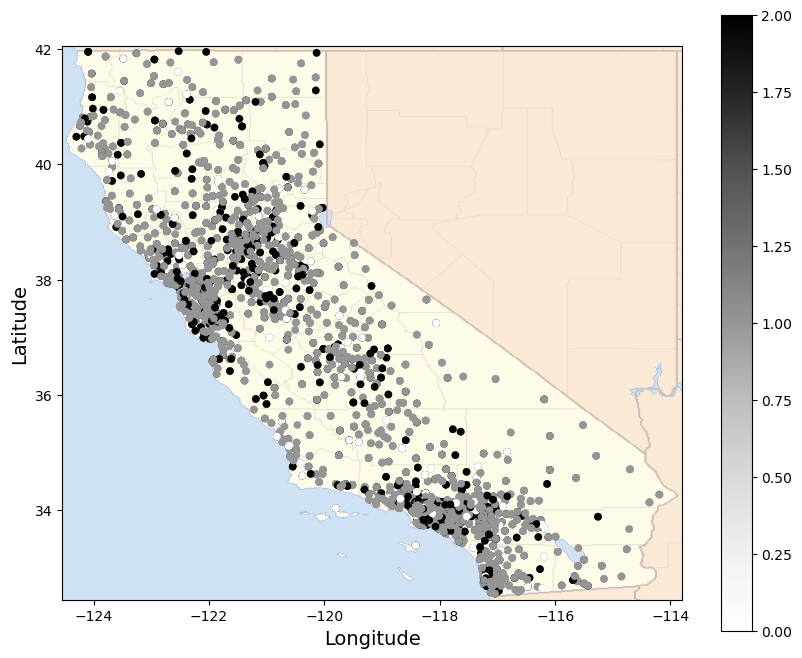

In [5]:
def assign_color(c):
    if c=='Churned': return 2
    elif c=='Stayed': return 1
    else: return 0

df2=df[['longitude','latitude','customer_status']].copy()
df2['color']=df2['customer_status'].apply(lambda x: assign_color(x))

df2.head()

california_img=mpimg.imread('california.png')
df2.plot(kind='scatter', x='longitude', y='latitude', #alpha=0.4, cmap=plt.get_cmap('jet'), 
         colorbar=True, figsize=(10,8), color=df2['color'])
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
#plt.legend() 
plt.show()

### Análisis de datos

Calcula el total de ingresos de todos los clientes (columna `total_revenue`)

Calcula el total de clientes

Cada cliente tiene un tipo de status, que puede ser "Joined" (dado de alta en el período considerado), "Churned" (dado de baja),  o "Stayed" (permanece). Calcula el número de clientes y el total de ingresos por `customer_status`

Cuando un cliente se da de baja, se anota la razón que alega entre una lista posible (revisa las columnas `churn_category`  y `churn_reason`). Genera un gráfico (usando la función "plot" de pandas) en el que se muestre la cantidad de clientes que se dan de baja por cada una de las razones posibles.

Compara (mediante un histograma) el tiempo de permanencia (columna `tenure_in_months`) de los clientes que permanecen y aquellos que se han dado de baja. Analiza el resultado.
Función "hist": https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

Compara (mediante un histograma) los ingresos totales para la compañía (columna `total_revenue`) de los clientes que permanecen y aquellos que se han dado de baja. Analiza el resultado.

Los clientes que han contribuido por encima de los ingresos medios de la empresa y han permanecido suscritos se consideran **clientes de alto valor**. Crea una nueva columna `high_value` que tenga un valor 1 para estos clientes y 0 para el resto. 

Compara los perfiles de los clientes de alto valor y los clientes que se han dado de baja en los siguientes aspectos:

1. Porcentaje de clientes casados en ambos perfiles (columna `married`)
2. Cantidad de clientes por el tipo de oferta que han suscrito (columna `offer`)
3. Porcentaje de clientes que optaron por un tipo de contrato renovable mes a mes (valor `Month-to-Month` en la columna `contract`)

Analiza el resultado